In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [210]:
df = pd.read_csv("hospitaldata.csv")  # Load dataset


In [211]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),Unknown,_Other,Referral,1,Other,...,No,No,No,No,No,No,No,No,No,No
1,149190,55629189,Caucasian,Female,[10-20),Unknown,Home,Emergency,3,Other,...,No,No,Up,No,No,No,No,Yes,Yes,After30Days
2,64410,86047875,AfricanAmerican,Female,[20-30),Unknown,Home,Emergency,2,Other,...,No,No,No,No,No,No,No,No,Yes,No
3,500364,82442376,Caucasian,Male,[30-40),Unknown,Home,Emergency,2,Other,...,No,No,Up,No,No,No,No,Yes,Yes,No
4,16680,42519267,Caucasian,Male,[40-50),Unknown,Home,Emergency,1,Other,...,No,No,Steady,No,No,No,No,Yes,Yes,No


In [212]:
df.describe()

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017630e+05,1.017630e+05,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,1.652008e+08,5.432965e+07,4.396018,43.095909,1.339691,16.021835,0.369368,0.197842,0.635585,7.422649
std,1.026410e+08,3.869658e+07,2.985092,19.674220,1.705792,8.127589,1.267282,0.930485,1.262877,1.933578
min,1.252200e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.495975e+07,2.341296e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523883e+08,4.550049e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302698e+08,8.754571e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [213]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [214]:
df.shape

(101763, 47)

In [215]:
df.info

<bound method DataFrame.info of         encounter_id  patient_nbr             race  gender      age    weight  \
0            2278392      8222157        Caucasian  Female   [0-10)   Unknown   
1             149190     55629189        Caucasian  Female  [10-20)   Unknown   
2              64410     86047875  AfricanAmerican  Female  [20-30)   Unknown   
3             500364     82442376        Caucasian    Male  [30-40)   Unknown   
4              16680     42519267        Caucasian    Male  [40-50)   Unknown   
...              ...          ...              ...     ...      ...       ...   
101758     443847548    100162476  AfricanAmerican    Male  [70-80)   Unknown   
101759     443847782     74694222  AfricanAmerican  Female  [80-90)   Unknown   
101760     443854148     41088789        Caucasian    Male  [70-80)   Unknown   
101761     443857166     31693671        Caucasian  Female  [80-90)   Unknown   
101762     443867222    175429310        Caucasian    Male  [70-80)   Unknown

In [216]:
df.fillna(df.mode().iloc[0], inplace=True)  # Replace missing values with mode


In [217]:
# Map age ranges to numerical midpoints
age_mapping = {
    "[0-10)": 5, "[10-20)": 15, "[20-30)": 25, "[30-40)": 35, "[40-50)": 45,
    "[50-60)": 55, "[60-70)": 65, "[70-80)": 75, "[80-90)": 85, "[90-100)": 95
}
df['age'] = df['age'].map(age_mapping)

In [218]:
# Convert target variable 'readmitted' into binary classification
df['readmitted'] = df['readmitted'].replace({'Within30Days': 'Yes', 'After30Days': 'Yes', 'No': 'No'})


In [219]:
print(df.dtypes)  # Check data types of all columns


encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                          int64
weight                      object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide           

In [220]:
# Convert target variable 'readmitted' into binary classification
df['readmitted'] = df['readmitted'].replace({'Within30Days': 'Yes', 'After30Days': 'No', 'No': 'No'})


In [221]:
# Handle 'Unknown' values in categorical columns
df.replace('Unknown', np.nan, inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)  # Replace missing values with mode


In [222]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [223]:
# Define features and target
X = df.drop(columns=['readmitted', 'encounter_id', 'patient_nbr'])  # Remove IDs
y = df['readmitted']


In [224]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [225]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [226]:
# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [227]:

# Make predictions
y_pred = log_reg.predict(X_test)

In [228]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [229]:

# Print results
print("Accuracy Score:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy Score: 0.6219230580258439
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.80      0.70     11016
           1       0.64      0.41      0.50      9337

    accuracy                           0.62     20353
   macro avg       0.63      0.61      0.60     20353
weighted avg       0.63      0.62      0.61     20353

Confusion Matrix:
 [[8825 2191]
 [5504 3833]]


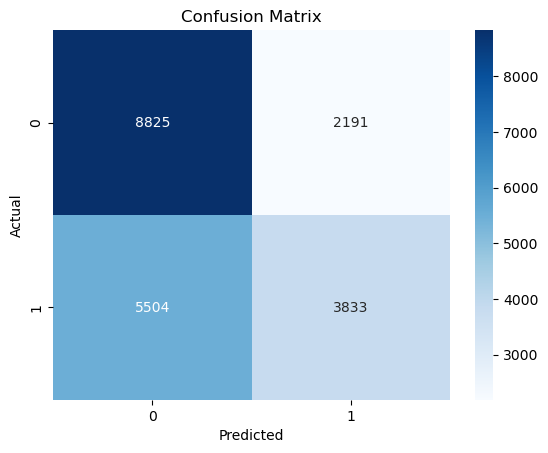

In [230]:
# Visualize Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
